In [134]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split 
#from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [135]:
mydata=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Yhills_July12_Analytics/main/hotel_bookings.csv")

In [136]:
mydata1=mydata

In [137]:
mydata.sample()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
94213,City Hotel,0,166,2016,July,31,30,2,1,2,0.0,0,BB,DEU,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,27.0,NaN,0,Transient-Party,81.25,0,0,Check-Out,08-02-2016


In [138]:
mydata['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [139]:
mydata['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [140]:
mydata.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [141]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [142]:
mydata.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [143]:
mydata.drop(['company'],axis=1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,75.00,0,0,Check-Out,07-02-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,07-02-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,07-03-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,09-06-2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,09-07-2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,09-07-2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,09-07-2017


In [144]:
median1=mydata['children'].median()
median1

0.0

In [145]:
mean1=mydata['children'].mean()
mean1

0.10388990333874994

In [146]:
median2=mydata['agent'].median()
median2

14.0

In [147]:
mydata['children'].replace(np.nan,median1,inplace=True)

In [148]:
mydata['agent'].replace(np.nan,median2,inplace=True)

In [149]:
median3=mydata['children'].median()
median3               # median 0 may be many 0

0.0

In [150]:
mydata.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                                  0
company         

In [151]:
mydata.isnull().sum()     #but there null value in children become 0

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                                  0
company         

In [152]:
mode1=mydata['country'].mode().values[0]   # categorical mode

In [153]:
mode1

'PRT'

In [154]:
mydata['country']=mydata['country'].replace(np.nan,mode1)

In [155]:
mydata.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                                  0
company         

In [156]:
mydata.drop('company',axis=1,inplace=True)
mydata.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,14.0,0,Transient,75.0,0,0,Check-Out,07-02-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,07-02-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,07-03-2015


In [157]:
mydata.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [158]:
duplicate=mydata.duplicated()
print(duplicate.sum())

32020


In [159]:
mydata[duplicate]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,07-03-2015
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,0,Transient,84.67,0,1,Check-Out,07-07-2015
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,0,Transient,137.00,0,1,Check-Out,07-07-2015
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,0,Transient,97.00,0,0,Canceled,07-01-2015
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,109.80,0,3,Check-Out,07-08-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,126.00,0,2,Check-Out,09-03-2017
119352,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,09-03-2017
119353,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,09-03-2017
119354,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,09-03-2017


In [160]:
mydata.drop_duplicates(inplace=True)

In [161]:
dp1=mydata.duplicated()
dp1.sum()

0

In [162]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87370 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87370 non-null  object 
 1   is_canceled                     87370 non-null  int64  
 2   lead_time                       87370 non-null  int64  
 3   arrival_date_year               87370 non-null  int64  
 4   arrival_date_month              87370 non-null  object 
 5   arrival_date_week_number        87370 non-null  int64  
 6   arrival_date_day_of_month       87370 non-null  int64  
 7   stays_in_weekend_nights         87370 non-null  int64  
 8   stays_in_week_nights            87370 non-null  int64  
 9   adults                          87370 non-null  int64  
 10  children                        87370 non-null  float64
 11  babies                          87370 non-null  int64  
 12  meal                           

In [163]:
mydata.shape

(87370, 31)

In [164]:
mydata.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
47785,City Hotel,1,31,2016,March,10,3,6,16,1,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,98.93,0,1,No-Show,03-03-2016
41555,City Hotel,0,14,2015,August,34,18,0,2,2,0.0,0,SC,NLD,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0,Contract,80.00,0,1,Check-Out,8/20/2015
15553,Resort Hotel,0,10,2015,July,30,20,1,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,14.0,0,Transient,164.00,1,0,Check-Out,7/25/2015
90552,City Hotel,0,247,2016,June,24,6,1,1,1,0.0,0,HB,DEU,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,6.0,0,Transient-Party,90.00,0,0,Check-Out,06-08-2016
79921,City Hotel,1,12,2015,November,47,17,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,1,0,A,A,0,No Deposit,8.0,0,Transient,105.75,0,0,Canceled,11-07-2015
86395,City Hotel,0,80,2016,March,14,29,0,4,1,0.0,0,SC,DEU,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,9.0,0,Transient-Party,81.25,1,0,Check-Out,04-02-2016
100020,City Hotel,0,19,2016,October,43,21,0,1,2,0.0,0,SC,FRA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0,Transient,140.00,0,2,Check-Out,10/22/2016
83550,City Hotel,0,1,2016,March,13,26,0,1,2,0.0,0,SC,PRT,Direct,Direct,1,0,1,A,A,0,No Deposit,14.0,0,Group,139.00,0,1,Check-Out,3/27/2016
71969,City Hotel,1,189,2017,July,29,16,2,2,2,0.0,0,BB,BEL,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0,Transient,107.10,0,0,Canceled,1/27/2017
25995,Resort Hotel,0,4,2016,July,29,13,1,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,165.80,0,1,Check-Out,7/18/2016


<function matplotlib.pyplot.show(close=None, block=None)>

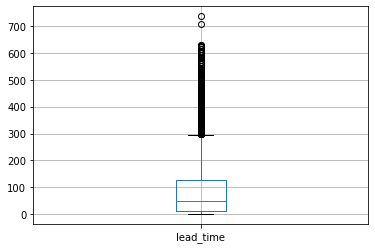

In [165]:
mydata.boxplot(column=['lead_time'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

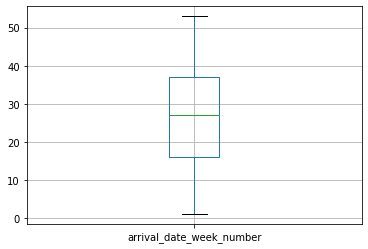

In [166]:
mydata.boxplot(column=['arrival_date_week_number'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

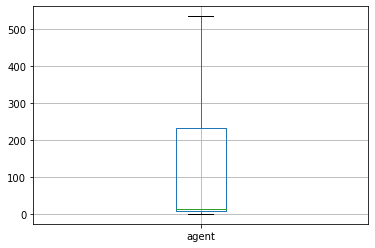

In [167]:
mydata.boxplot(column=['agent'])
plt.show

In [168]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [169]:
lowlead_time,upplead_time=remove_outlier(mydata['lead_time'])
mydata['lead_time']=np.where(mydata["lead_time"]>upplead_time,upplead_time,mydata['lead_time'])
mydata['lead_time']=np.where(mydata["lead_time"]<lowlead_time,lowlead_time,mydata['lead_time'])

<function matplotlib.pyplot.show(close=None, block=None)>

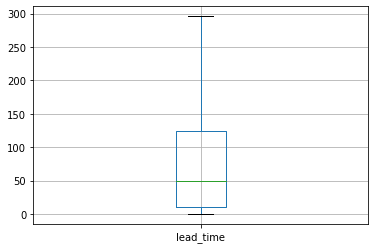

In [170]:
mydata.boxplot(column=['lead_time']) #outlier finished
plt.show

###  Normalisation and scaling

In [171]:
from sklearn.preprocessing import StandardScaler
std_scale =StandardScaler()
std_scale

StandardScaler()

In [172]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87370 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87370 non-null  object 
 1   is_canceled                     87370 non-null  int64  
 2   lead_time                       87370 non-null  float64
 3   arrival_date_year               87370 non-null  int64  
 4   arrival_date_month              87370 non-null  object 
 5   arrival_date_week_number        87370 non-null  int64  
 6   arrival_date_day_of_month       87370 non-null  int64  
 7   stays_in_weekend_nights         87370 non-null  int64  
 8   stays_in_week_nights            87370 non-null  int64  
 9   adults                          87370 non-null  int64  
 10  children                        87370 non-null  float64
 11  babies                          87370 non-null  int64  
 12  meal                           

In [173]:
#mydata['is_canceled']=std_scale.fit_transform(mydata[['is_canceled']])
mydata['lead_time']=std_scale.fit_transform(mydata[['lead_time']])
mydata['arrival_date_year']=std_scale.fit_transform(mydata[['arrival_date_year']])
#mydata['arrival_date_month']=std_scale.fit_transform(mydata[['arrival_date_month']])
mydata['arrival_date_week_number']=std_scale.fit_transform(mydata[['arrival_date_week_number']])
mydata['arrival_date_day_of_month']=std_scale.fit_transform(mydata[['arrival_date_day_of_month']])
mydata['stays_in_weekend_nights']=std_scale.fit_transform(mydata[['stays_in_weekend_nights']])
mydata['stays_in_week_nights']=std_scale.fit_transform(mydata[['stays_in_week_nights']])
mydata['adults']=std_scale.fit_transform(mydata[['adults']])
mydata['children']=std_scale.fit_transform(mydata[['children']])
mydata['babies']=std_scale.fit_transform(mydata[['babies']])
mydata['is_repeated_guest']=std_scale.fit_transform(mydata[['is_repeated_guest']])
mydata['previous_cancellations']=std_scale.fit_transform(mydata[['previous_cancellations']])
mydata['previous_bookings_not_canceled']=std_scale.fit_transform(mydata[['previous_bookings_not_canceled']])
mydata['booking_changes']=std_scale.fit_transform(mydata[['booking_changes']])
mydata['days_in_waiting_list']=std_scale.fit_transform(mydata[['days_in_waiting_list']])
mydata['agent']=std_scale.fit_transform(mydata[['agent']])
mydata['adr']=std_scale.fit_transform(mydata[['adr']])
mydata['required_car_parking_spaces']=std_scale.fit_transform(mydata[['required_car_parking_spaces']])
mydata['total_of_special_requests']=std_scale.fit_transform(mydata[['total_of_special_requests']])

In [174]:
mydata.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
83524,City Hotel,0,-0.917752,-0.306495,February,-1.524124,-1.337367,-0.974301,-0.304720,0.198010,-0.304157,-0.095302,BB,DEU,Online TA,TA/TO,-0.201684,-0.082401,-0.106253,A,D,-0.373520,No Deposit,-0.681040,-0.07485,Transient,-0.242654,-0.299218,0.362239,Check-Out,02-06-2016
18300,Resort Hotel,0,-0.942428,-1.763984,November,1.474459,0.020899,-0.005279,-1.278582,-1.398237,-0.304157,-0.095302,BB,PRT,Offline TA/TO,TA/TO,-0.201684,-0.082401,-0.106253,A,A,-0.373520,No Deposit,-0.708663,-0.07485,Transient,-1.478929,-0.299218,-0.839768,Check-Out,11/17/2015
99361,City Hotel,0,1.253745,-0.306495,October,1.108778,-0.658234,-0.005279,-0.304720,-1.398237,-0.304157,-0.095302,BB,NLD,Offline TA/TO,TA/TO,-0.201684,-0.082401,-0.106253,A,A,1.001371,No Deposit,1.390746,-0.07485,Transient-Party,0.248220,-0.299218,-0.839768,Check-Out,10/13/2016
86037,City Hotel,0,-0.942428,-0.306495,March,-1.012170,0.926410,-0.974301,-0.304720,0.198010,-0.304157,-0.095302,SC,ESP,Online TA,TA/TO,-0.201684,-0.082401,-0.106253,A,A,-0.373520,No Deposit,-0.681040,-0.07485,Transient,0.502747,-0.299218,0.362239,Check-Out,3/26/2016
25003,Resort Hotel,0,0.994646,-0.306495,June,-0.207673,-1.224178,0.963743,1.156072,0.198010,-0.304157,-0.095302,HB,GBR,Offline TA/TO,TA/TO,-0.201684,-0.082401,-0.106253,A,A,-0.373520,No Deposit,-0.395594,-0.07485,Contract,-0.445367,-0.299218,-0.839768,Check-Out,06-12-2016
5154,Resort Hotel,0,1.155041,-0.306495,April,-0.719626,0.247277,1.932765,1.156072,-1.398237,-0.304157,-0.095302,HB,BRA,Offline TA/TO,TA/TO,-0.201684,-0.082401,-0.106253,A,A,-0.373520,No Deposit,0.295001,-0.07485,Transient-Party,-1.046233,-0.299218,0.362239,Check-Out,4/26/2016
110922,City Hotel,0,0.032278,1.150994,May,-0.646490,-1.676934,-0.005279,-0.304720,1.794257,-0.304157,-0.095302,BB,ITA,Online TA,TA/TO,-0.201684,-0.082401,-0.106253,F,F,1.001371,No Deposit,-0.681040,-0.07485,Transient,2.248076,-0.299218,-0.839768,Check-Out,05-04-2017
15269,Resort Hotel,1,0.809575,-1.763984,July,0.011736,-1.450556,-0.974301,-0.304720,0.198010,-0.304157,-0.095302,BB,PRT,Online TA,TA/TO,-0.201684,2.626175,-0.106253,A,A,-0.373520,No Deposit,1.445993,-0.07485,Transient,0.302761,-0.299218,0.362239,Canceled,6/30/2015
60883,City Hotel,1,0.895942,-0.306495,November,1.547595,1.039599,-0.974301,-0.304720,0.198010,-0.304157,-0.095302,SC,ESP,Online TA,TA/TO,-0.201684,-0.082401,-0.106253,A,A,-0.373520,No Deposit,-0.681040,-0.07485,Transient,-0.493545,-0.299218,0.362239,Canceled,9/19/2016
100174,City Hotel,0,-0.177469,-0.306495,October,1.181915,0.360466,-0.005279,0.669141,0.198010,-0.304157,-0.095302,BB,DEU,Offline TA/TO,TA/TO,-0.201684,-0.082401,-0.106253,D,E,-0.373520,No Deposit,-0.561336,-0.07485,Transient,-0.182658,-0.299218,-0.839768,Check-Out,10/24/2016


In [175]:
dummies=pd.get_dummies(mydata[['hotel','arrival_date_month','meal','market_segment','distribution_channel','reserved_room_type','assigned_room_type','customer_type','reservation_status','reservation_status_date','country','deposit_type']],columns=['hotel','arrival_date_month','meal','market_segment','distribution_channel','reserved_room_type','assigned_room_type','customer_type','reservation_status','reservation_status_date','country','deposit_type'])

In [176]:
dummies.head()

,hotel_City Hotel,hotel_Resort Hotel,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,...,country_SYC,country_SYR,country_TGO,country_THA,country_TJK,country_TMP,country_TUN,country_TUR,country_TWN,country_TZA,country_UGA,country_UKR,country_UMI,country_URY,country_USA,country_UZB,country_VEN,country_VGB,country_VNM,country_ZAF,country_ZMB,country_ZWE,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [177]:
columns=['hotel','arrival_date_month','meal','market_segment','distribution_channel','reserved_room_type','assigned_room_type','customer_type','reservation_status','reservation_status_date','country','deposit_type']
mydata=pd.concat([mydata,dummies],axis=1)
mydata.drop(columns,axis=1,inplace=True)  # drop object columns dummies

In [178]:
mydata.dtypes   #uint8-encoding

is_canceled                    int64
lead_time                    float64
arrival_date_year            float64
arrival_date_week_number     float64
arrival_date_day_of_month    float64
                              ...   
country_ZMB                    uint8
country_ZWE                    uint8
deposit_type_No Deposit        uint8
deposit_type_Non Refund        uint8
deposit_type_Refundable        uint8
Length: 1186, dtype: object

In [179]:
mydata.sample()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel_City Hotel,hotel_Resort Hotel,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,...,country_SYC,country_SYR,country_TGO,country_THA,country_TJK,country_TMP,country_TUN,country_TUR,country_TWN,country_TZA,country_UGA,country_UKR,country_UMI,country_URY,country_USA,country_UZB,country_VEN,country_VGB,country_VNM,country_ZAF,country_ZMB,country_ZWE,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable
71710,1,1.019322,1.150994,0.084872,-0.658234,0.963743,1.156072,0.19801,-0.304157,-0.095302,-0.201684,-0.082401,-0.106253,-0.37352,-0.68104,-0.07485,0.66819,-0.299218,-0.839768,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [180]:
pd.set_option("display.max_columns",50)

In [181]:
mydata.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel_City Hotel,hotel_Resort Hotel,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,...,country_SYC,country_SYR,country_TGO,country_THA,country_TJK,country_TMP,country_TUN,country_TUR,country_TWN,country_TZA,country_UGA,country_UKR,country_UMI,country_URY,country_USA,country_UZB,country_VEN,country_VGB,country_VNM,country_ZAF,country_ZMB,country_ZWE,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable
0,0,2.684959,-1.763984,0.011736,-1.676934,-0.974301,-1.278582,0.198010,-0.304157,-0.095302,-0.201684,-0.082401,-0.106253,3.751152,-0.635000,-0.07485,-1.933442,-0.299218,-0.839768,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,2.684959,-1.763984,0.011736,-1.676934,-0.974301,-1.278582,0.198010,-0.304157,-0.095302,-0.201684,-0.082401,-0.106253,5.126043,-0.635000,-0.07485,-1.933442,-0.299218,-0.839768,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,-0.880737,-1.763984,0.011736,-1.676934,-0.974301,-0.791651,-1.398237,-0.304157,-0.095302,-0.201684,-0.082401,-0.106253,-0.373520,-0.635000,-0.07485,-0.569903,-0.299218,-0.839768,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,-0.806709,-1.763984,0.011736,-1.676934,-0.974301,-0.791651,-1.398237,-0.304157,-0.095302,-0.201684,-0.082401,-0.106253,-0.373520,2.035301,-0.07485,-0.569903,-0.299218,-0.839768,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,-0.794371,-1.763984,0.011736,-1.676934,-0.974301,-0.304720,0.198010,-0.304157,-0.095302,-0.201684,-0.082401,-0.106253,-0.373520,1.445993,-0.07485,-0.151752,-0.299218,0.362239,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [182]:
mydata.sample(10)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel_City Hotel,hotel_Resort Hotel,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,...,country_SYC,country_SYR,country_TGO,country_THA,country_TJK,country_TMP,country_TUN,country_TUR,country_TWN,country_TZA,country_UGA,country_UKR,country_UMI,country_URY,country_USA,country_UZB,country_VEN,country_VGB,country_VNM,country_ZAF,country_ZMB,country_ZWE,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable
21305,0,-0.967104,-0.306495,-1.304715,1.039599,-0.974301,-1.278582,-1.398237,-0.304157,-0.095302,4.958244,-0.082401,-0.106253,-0.373520,-0.635000,-0.07485,-1.933442,-0.299218,-0.839768,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
64525,1,1.278421,1.150994,-1.231579,-0.545045,0.963743,1.643003,0.198010,-0.304157,-0.095302,-0.201684,-0.082401,-0.106253,-0.373520,2.274707,-0.07485,-0.297196,-0.299218,-0.839768,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
63106,1,-0.967104,1.150994,-1.597260,-1.676934,-0.974301,-0.791651,-1.398237,-0.304157,-0.095302,-0.201684,-0.082401,-0.106253,-0.373520,0.101635,-0.07485,-1.115319,-0.299218,-0.839768,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
110332,0,-0.004736,1.150994,-0.719626,0.813221,0.963743,-0.791651,0.198010,-0.304157,-0.095302,-0.201684,-0.082401,-0.106253,-0.373520,-0.699455,-0.07485,-0.257744,-0.299218,0.362239,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
64278,1,-0.856061,1.150994,-1.304715,-1.337367,-0.974301,-0.791651,0.198010,-0.304157,-0.095302,-0.201684,-0.082401,-0.106253,-0.373520,-0.681040,-0.07485,0.030054,-0.299218,-0.839768,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
19886,0,-0.510596,-0.306495,-1.816668,-1.450556,0.963743,0.182210,0.198010,-0.304157,-0.095302,-0.201684,-0.082401,-0.106253,-0.373520,-0.708663,-0.07485,-1.460749,-0.299218,-0.839768,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
69194,1,-0.806709,1.150994,-0.427081,1.265977,-0.974301,-0.791651,0.198010,-0.304157,-0.095302,-0.201684,-0.082401,-0.106253,-0.373520,-0.681040,-0.07485,1.520856,-0.299218,0.362239,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
42388,0,-0.646314,-1.763984,0.669961,-1.224178,0.963743,-0.791651,1.794257,1.889160,-0.095302,-0.201684,-0.082401,-0.106253,-0.373520,-0.635000,-0.07485,0.925444,-0.299218,0.362239,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
36843,0,2.684959,1.150994,-0.427081,0.926410,0.963743,1.156072,0.198010,-0.304157,8.706536,-0.201684,-0.082401,-0.106253,1.001371,-0.708663,-0.07485,-0.959512,3.252299,1.564247,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
74134,1,2.684959,-1.763984,0.889370,0.926410,-0.974301,-0.304720,0.198010,-0.304157,-0.095302,-0.201684,2.626175,-0.106253,-0.373520,-0.754703,-0.07485,-0.806250,-0.299218,-0.839768,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [183]:
pd.set_option("display.max_rows",50)

In [184]:
mydata.dtypes

is_canceled                    int64
lead_time                    float64
arrival_date_year            float64
arrival_date_week_number     float64
arrival_date_day_of_month    float64
                              ...   
country_ZMB                    uint8
country_ZWE                    uint8
deposit_type_No Deposit        uint8
deposit_type_Non Refund        uint8
deposit_type_Refundable        uint8
Length: 1186, dtype: object

In [185]:
X=mydata.drop(['is_canceled'],axis=1)   # drop depending variable
y=mydata['is_canceled']

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=1)

In [187]:
mydata.dtypes

is_canceled                    int64
lead_time                    float64
arrival_date_year            float64
arrival_date_week_number     float64
arrival_date_day_of_month    float64
                              ...   
country_ZMB                    uint8
country_ZWE                    uint8
deposit_type_No Deposit        uint8
deposit_type_Non Refund        uint8
deposit_type_Refundable        uint8
Length: 1186, dtype: object

In [188]:
print(X)

        lead_time  arrival_date_year  arrival_date_week_number  \
0        2.684959          -1.763984                  0.011736   
1        2.684959          -1.763984                  0.011736   
2       -0.880737          -1.763984                  0.011736   
3       -0.806709          -1.763984                  0.011736   
4       -0.794371          -1.763984                  0.011736   
...           ...                ...                       ...   
119385  -0.683329           1.150994                  0.596825   
119386   0.291377           1.150994                  0.596825   
119387  -0.547610           1.150994                  0.596825   
119388   0.377744           1.150994                  0.596825   
119389   1.562196           1.150994                  0.596825   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                       -1.676934                -0.974301   
1                       -1.676934                -0.974301   
2                    

In [189]:
print(y)

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 87370, dtype: int64


In [190]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [191]:
predictions=model.predict(X_test)

In [192]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

1.0

In [193]:
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19074
           1       1.00      1.00      1.00      7137

    accuracy                           1.00     26211
   macro avg       1.00      1.00      1.00     26211
weighted avg       1.00      1.00      1.00     26211



In [194]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[19074,     0],
       [    0,  7137]], dtype=int64)

<AxesSubplot:>

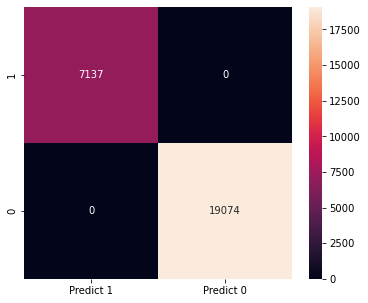

In [195]:
cm=metrics.confusion_matrix(y_test,predictions,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in ['1','0']],
                  columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [196]:
from sklearn.svm import SVC

In [197]:
clf=SVC(kernel='linear',C=1,gamma='auto')   # kernel for dimension for which good score 
clf.fit(X_train,y_train)

SVC(C=1, gamma='auto', kernel='linear')

In [198]:
clf.score(X_train,y_train)

1.0

In [199]:
clf.score(X_test,y_test)

1.0

In [200]:
from sklearn.neighbors import KNeighborsClassifier

In [201]:
knn=KNeighborsClassifier(n_neighbors=5,p=1)  #p=1 manhartan p=2 euclidian

In [202]:
knn.fit(X_train,y_train)

KNeighborsClassifier(p=1)